In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
df=pd.read_csv("https://raw.githubusercontent.com/Shivan118/Machine-Learning-Project/master/Coronavirus_Project/patient.csv")
df

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5323,5324,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5324,5325,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5325,5326,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated
5326,5327,NaN,NaN,Korea,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-03,NaN,NaN,isolated


# EDA

In [35]:
data=pd.read_csv('patient.csv')

In [36]:
data.head()

,Unnamed: 0,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [37]:
##.info() function is used to get a concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5328 entries, 0 to 5327
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5328 non-null   int64  
 1   id                5328 non-null   int64  
 2   sex               383 non-null    object 
 3   birth_year        370 non-null    float64
 4   country           5328 non-null   object 
 5   region            371 non-null    object 
 6   group             81 non-null     object 
 7   infection_reason  140 non-null    object 
 8   infection_order   35 non-null     float64
 9   infected_by       70 non-null     float64
 10  contact_number    47 non-null     float64
 11  confirmed_date    5328 non-null   object 
 12  released_date     32 non-null     object 
 13  deceased_date     20 non-null     object 
 14  state             5328 non-null   object 
dtypes: float64(4), int64(2), object(9)
memory usage: 624.5+ KB


In [38]:
#checking statistic summary & it will show you only for "Numerical Data" not 
data.describe()

,Unnamed: 0,id,birth_year,infection_order,infected_by,contact_number
count,5328.000000,5328.000000,370.000000,35.000000,70.000000,47.000000
mean,2663.500000,2664.500000,1973.589189,2.285714,379.000000,72.978723
std,1538.205448,1538.205448,17.560546,1.405272,540.247528,188.155288
min,0.000000,1.000000,1932.000000,1.000000,3.000000,0.000000
25%,1331.750000,1332.750000,1960.000000,1.000000,29.250000,2.500000
50%,2663.500000,2664.500000,1974.000000,2.000000,126.000000,16.000000
75%,3995.250000,3996.250000,1987.750000,3.000000,563.250000,46.000000
max,5327.000000,5328.000000,2018.000000,6.000000,2621.000000,1160.000000


In [40]:
#Removing duplicates if any
data.duplicated().sum()  
data.drop_duplicates(inplace=True)

In [42]:
#checking number of NUll Values in an Data Set
data.isnull().sum()  

Unnamed: 0             0
id                     0
sex                 4945
birth_year          4958
country                0
region              4957
group               5247
infection_reason    5188
infection_order     5293
infected_by         5258
contact_number      5281
confirmed_date         0
released_date       5296
deceased_date       5308
state                  0
dtype: int64

In [43]:
#checking shape of dataset


print(data.shape)  


#(5328, 14)
data.columns 

(5328, 15)


Index(['Unnamed: 0', 'id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')

In [44]:
# Count all male and female data.
data['sex'].value_counts()  

female    194
male      189
Name: sex, dtype: int64

In [45]:
#applying lambda function to change sex Female & Male to 0 & 1
data.sex = data.sex.apply(lambda X : 0 if X == 'female' else 1)
data.head(5)

,Unnamed: 0,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,0,1,0,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,1,2,1,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,2,3,1,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,3,4,1,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,4,5,1,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,2020-03-02,NaN,released


In [47]:
#checking statistic summary & it will show you only for "Numerical Data" n
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5328.0,2663.500000,1538.205448,0.0,1331.75,2663.5,3995.25,5327.0
id,5328.0,2664.500000,1538.205448,1.0,1332.75,2664.5,3996.25,5328.0
sex,5328.0,0.963589,0.187329,0.0,1.00,1.0,1.00,1.0
birth_year,370.0,1973.589189,17.560546,1932.0,1960.00,1974.0,1987.75,2018.0
infection_order,35.0,2.285714,1.405272,1.0,1.00,2.0,3.00,6.0
infected_by,70.0,379.000000,540.247528,3.0,29.25,126.0,563.25,2621.0
contact_number,47.0,72.978723,188.155288,0.0,2.50,16.0,46.00,1160.0


# Data Visualization

<AxesSubplot:>

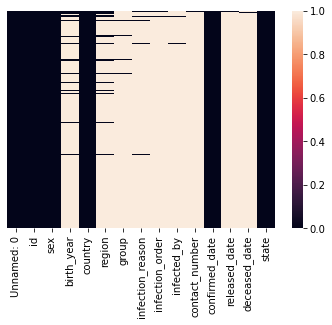

In [48]:
sns.heatmap(data.isnull(), yticklabels = False)  #checking NULl Values via graph,where you can find yellow colour w

Text(0.5, 1.0, 'Regions affected Overall')

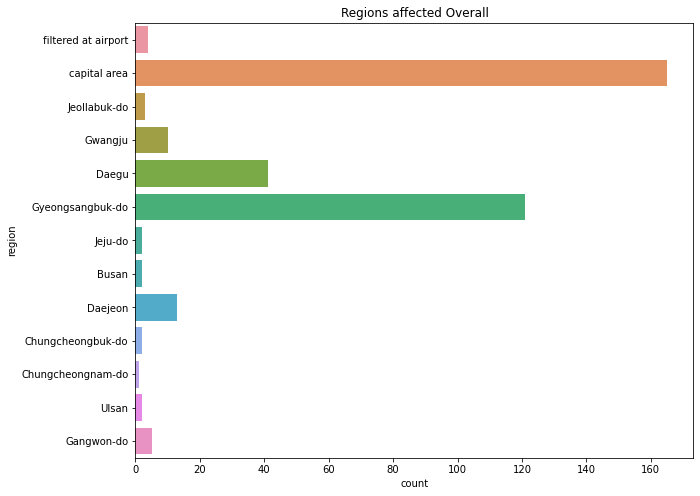

In [49]:
# sns.set(rc={'figure.figsize':(10,8)})

plt.figure(figsize=(10,8))
sns.countplot(y=data['region'],).set_title('Regions affected Overall') # Ploting graph which regions maximum numb

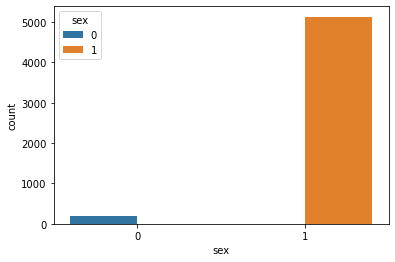

In [50]:
sns.countplot(x='sex',data=data, hue='sex');  # sex Female & Male to 0 & 1

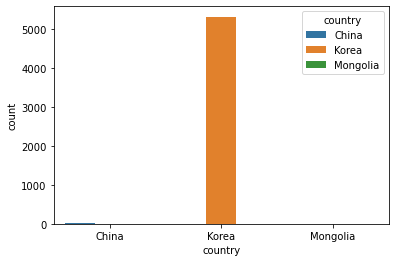

In [51]:
# Ploting Graph which Country maximum number of affected people. 
sns.countplot(x='country',data=data, hue='country'); 



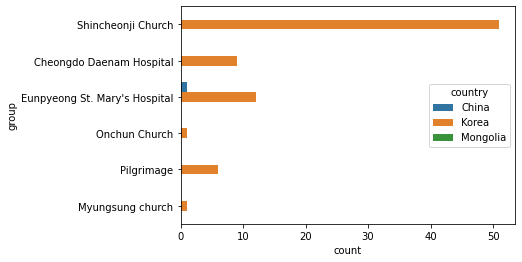

In [52]:
# Ploting Graph which area maximum number of affected people in country. 
sns.countplot(y='group',data=data, hue='country');  




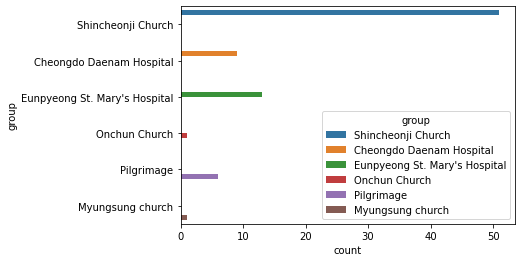

In [53]:
sns.countplot(y='group',data=data, hue='group');  

# confirmed patients trend



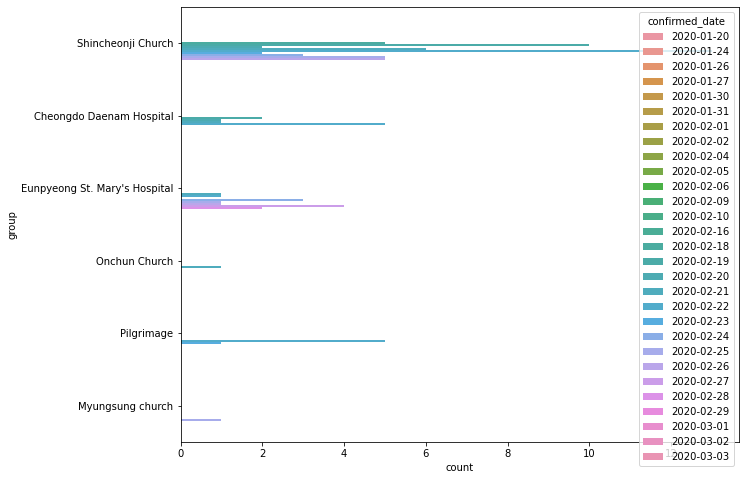

In [54]:
plt.figure(figsize=(10,8))
sns.countplot(y='group',data=data, hue='confirmed_date');  

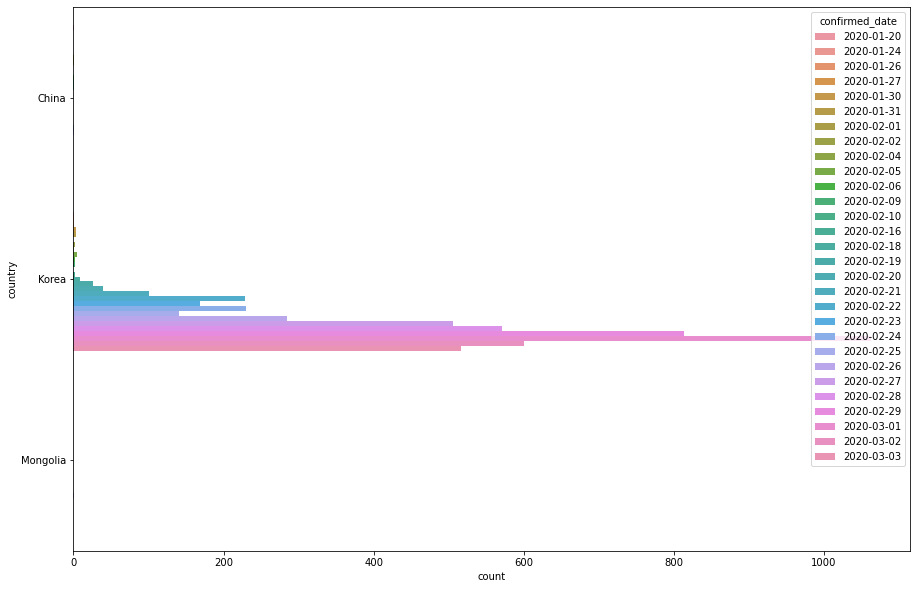

In [55]:
plt.figure(figsize=(15,10))
sns.countplot(y='country',data=data, hue='confirmed_date');
# sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in K

Text(0.5, 1.0, 'Confirmed dates in Korea')

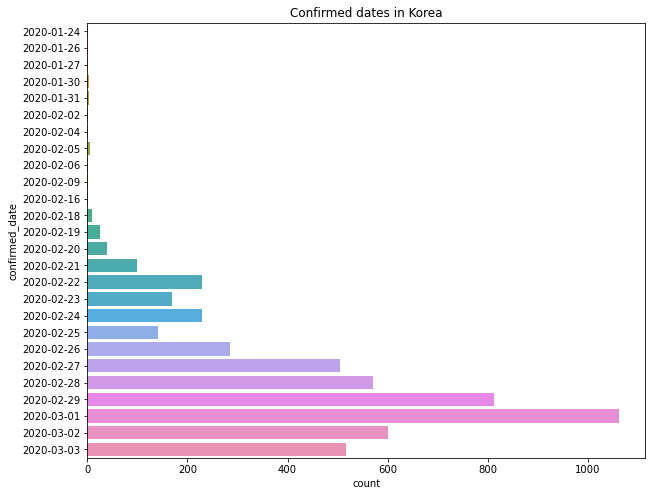

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="Korea")],).set_title('Confirmed dates in Korea')  
# ploting the graph confirmed date of the human infected or not in the Korea Country

Text(0.5, 1.0, 'Confirmed dates in China')

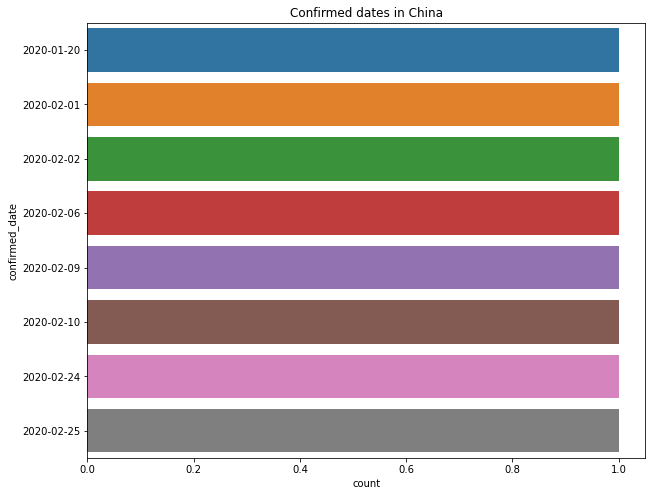

In [58]:
# ploting the graph confirmed date of the human infected or not in the China Country
plt.figure(figsize=(10,8))
sns.countplot(y=data['confirmed_date'].loc[(data['country']=="China")],).set_title('Confirmed dates in China')


Text(0.5, 1.0, 'Confirmed dates in Mongloia')

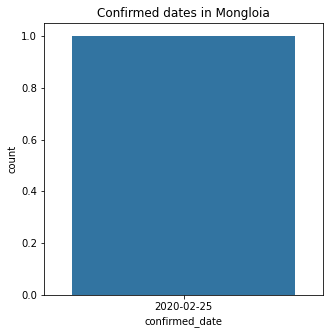

In [59]:
# ploting the graph confirmed date of the human infected or not in the Mongloia Country
plt.figure(figsize=(5,5))
sns.countplot(x=data['confirmed_date'].loc[(data['country']=="Mongolia")],).set_title('Confirmed dates in Mongloia')


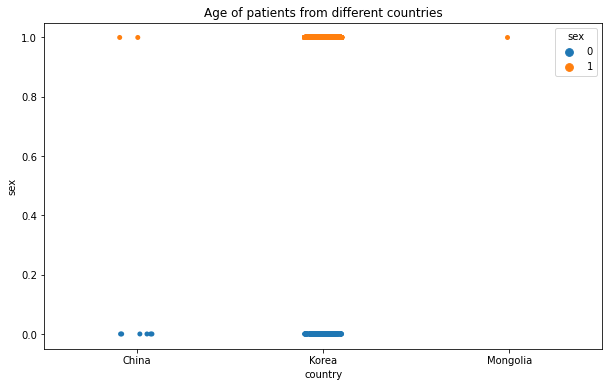

In [60]:
plt.figure(figsize=(10,6))
sns.stripplot(x=data.country, y=data.sex, hue=data.sex)
plt.title("Age of patients from different countries")
plt.show()

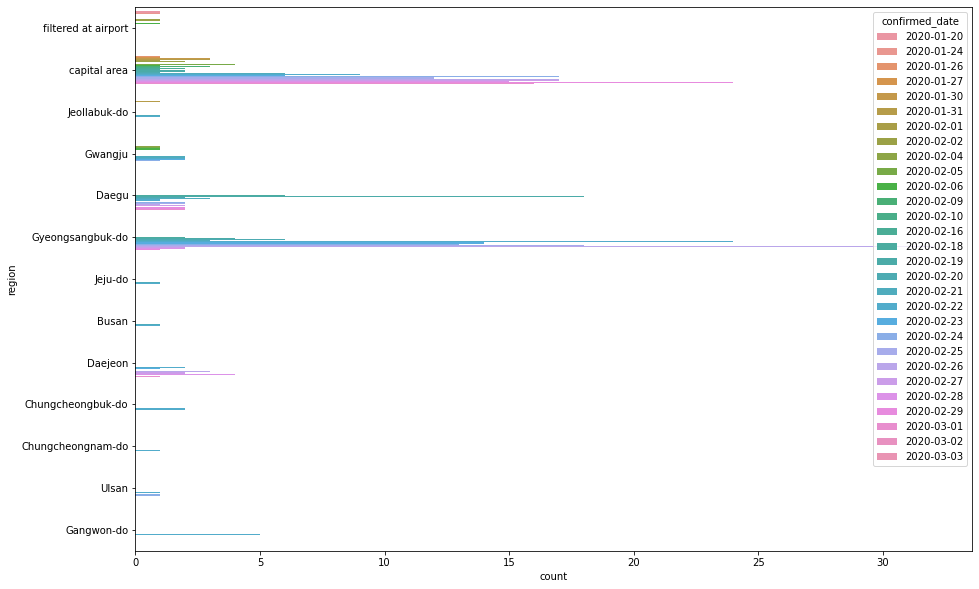

In [62]:
plt.figure(figsize=(15,10))
sns.countplot(y='region',data=data, hue='confirmed_date');

<AxesSubplot:>

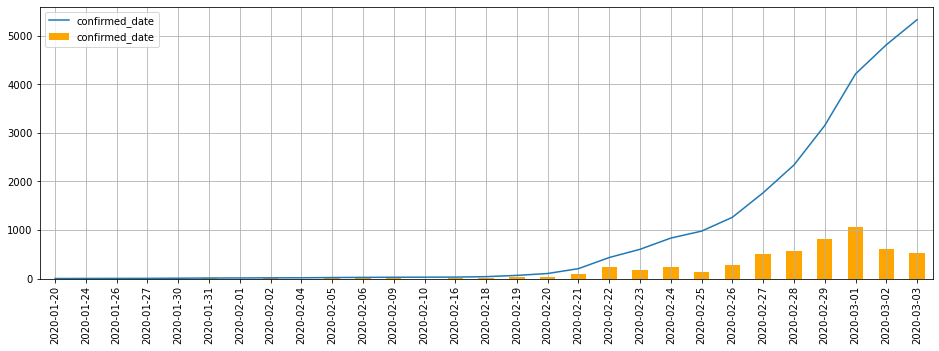

In [63]:
confirmed_patients_series = data['confirmed_date'].value_counts().sort_index()

confirmed_patients_series.cumsum().plot(legend='accumulated')
confirmed_patients_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<AxesSubplot:>

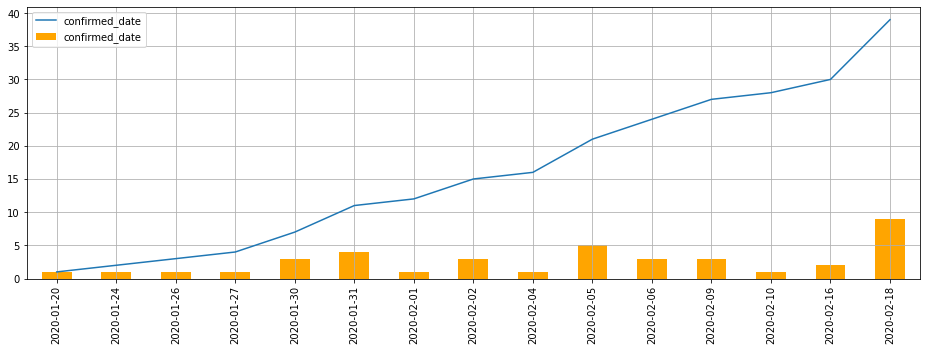

In [64]:
# before no.31 patient confirmed
limit_series = confirmed_patients_series[:data[data['id'] == 31]['confirmed_date'].values[0]]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<AxesSubplot:>

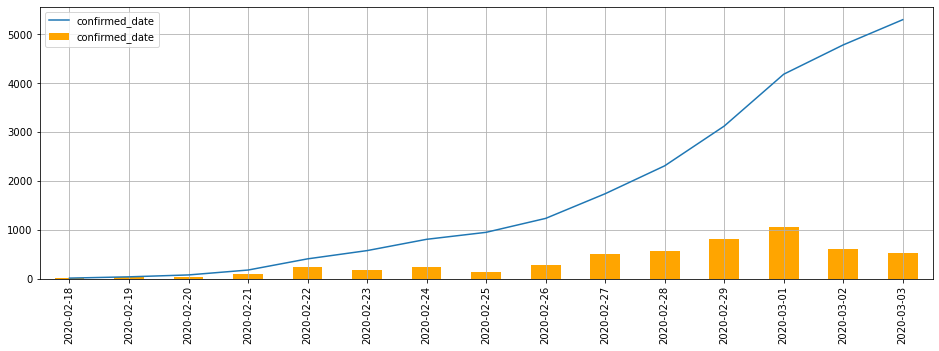

In [65]:
# after no.31 patient confirmed
limit_series = confirmed_patients_series[data[data['id'] == 31]['confirmed_date'].values[0]:]
limit_series.cumsum().plot(legend='accumulated')
limit_series.plot(kind='bar', color='orange', legend='daily', figsize=(16, 5), grid=True)

<AxesSubplot:xlabel='state', ylabel='count'>

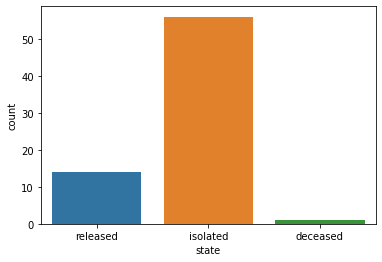

In [66]:
sns.countplot(x=data['state'].loc[(data['infection_reason']=='contact with patient')])

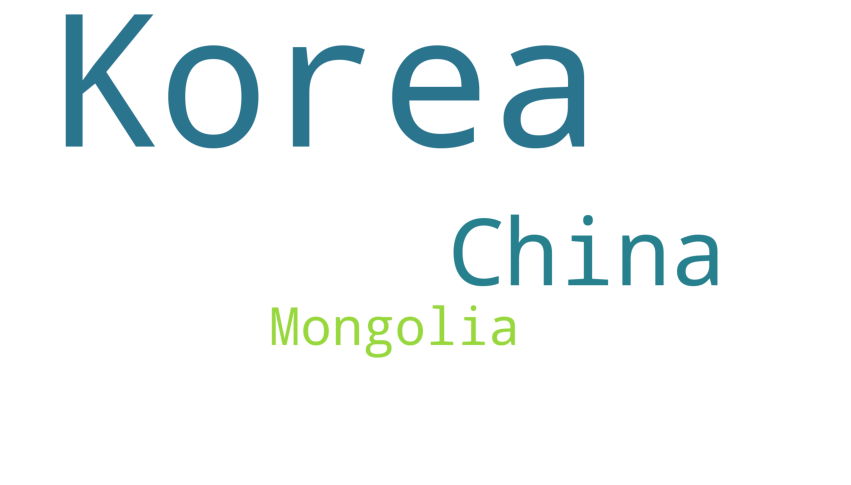

In [68]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15)) #Using WordCloud to check most frequently country suffered from "Coronavirus" 
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.country))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('country.png')
plt.show()